In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv(r"/content/Mall_Customers.csv")

# Univariant Analysis

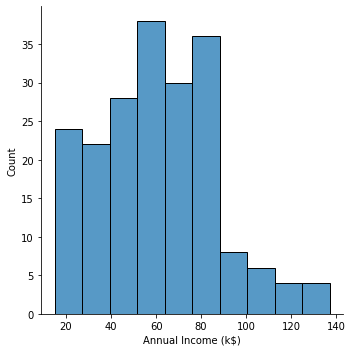

In [3]:
sns.displot(df['Annual Income (k$)'])

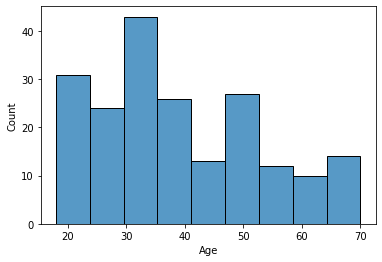

In [4]:
sns.histplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


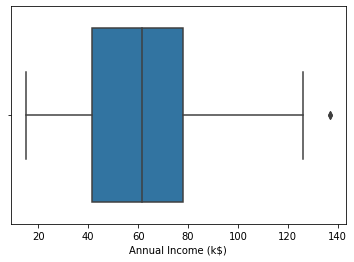

In [5]:
sns.boxplot(df['Annual Income (k$)'])

# Bivariate Analaysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


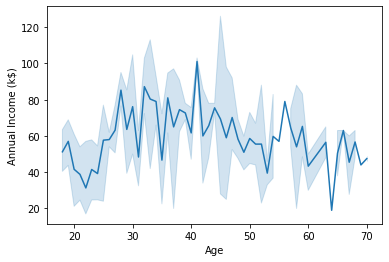

In [6]:
sns.lineplot(df['Age'], df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


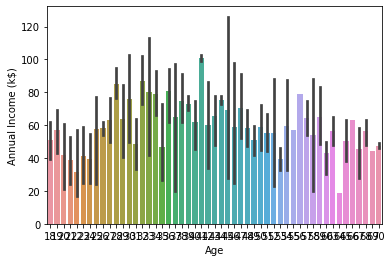

In [7]:
sns.barplot(df['Age'], df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


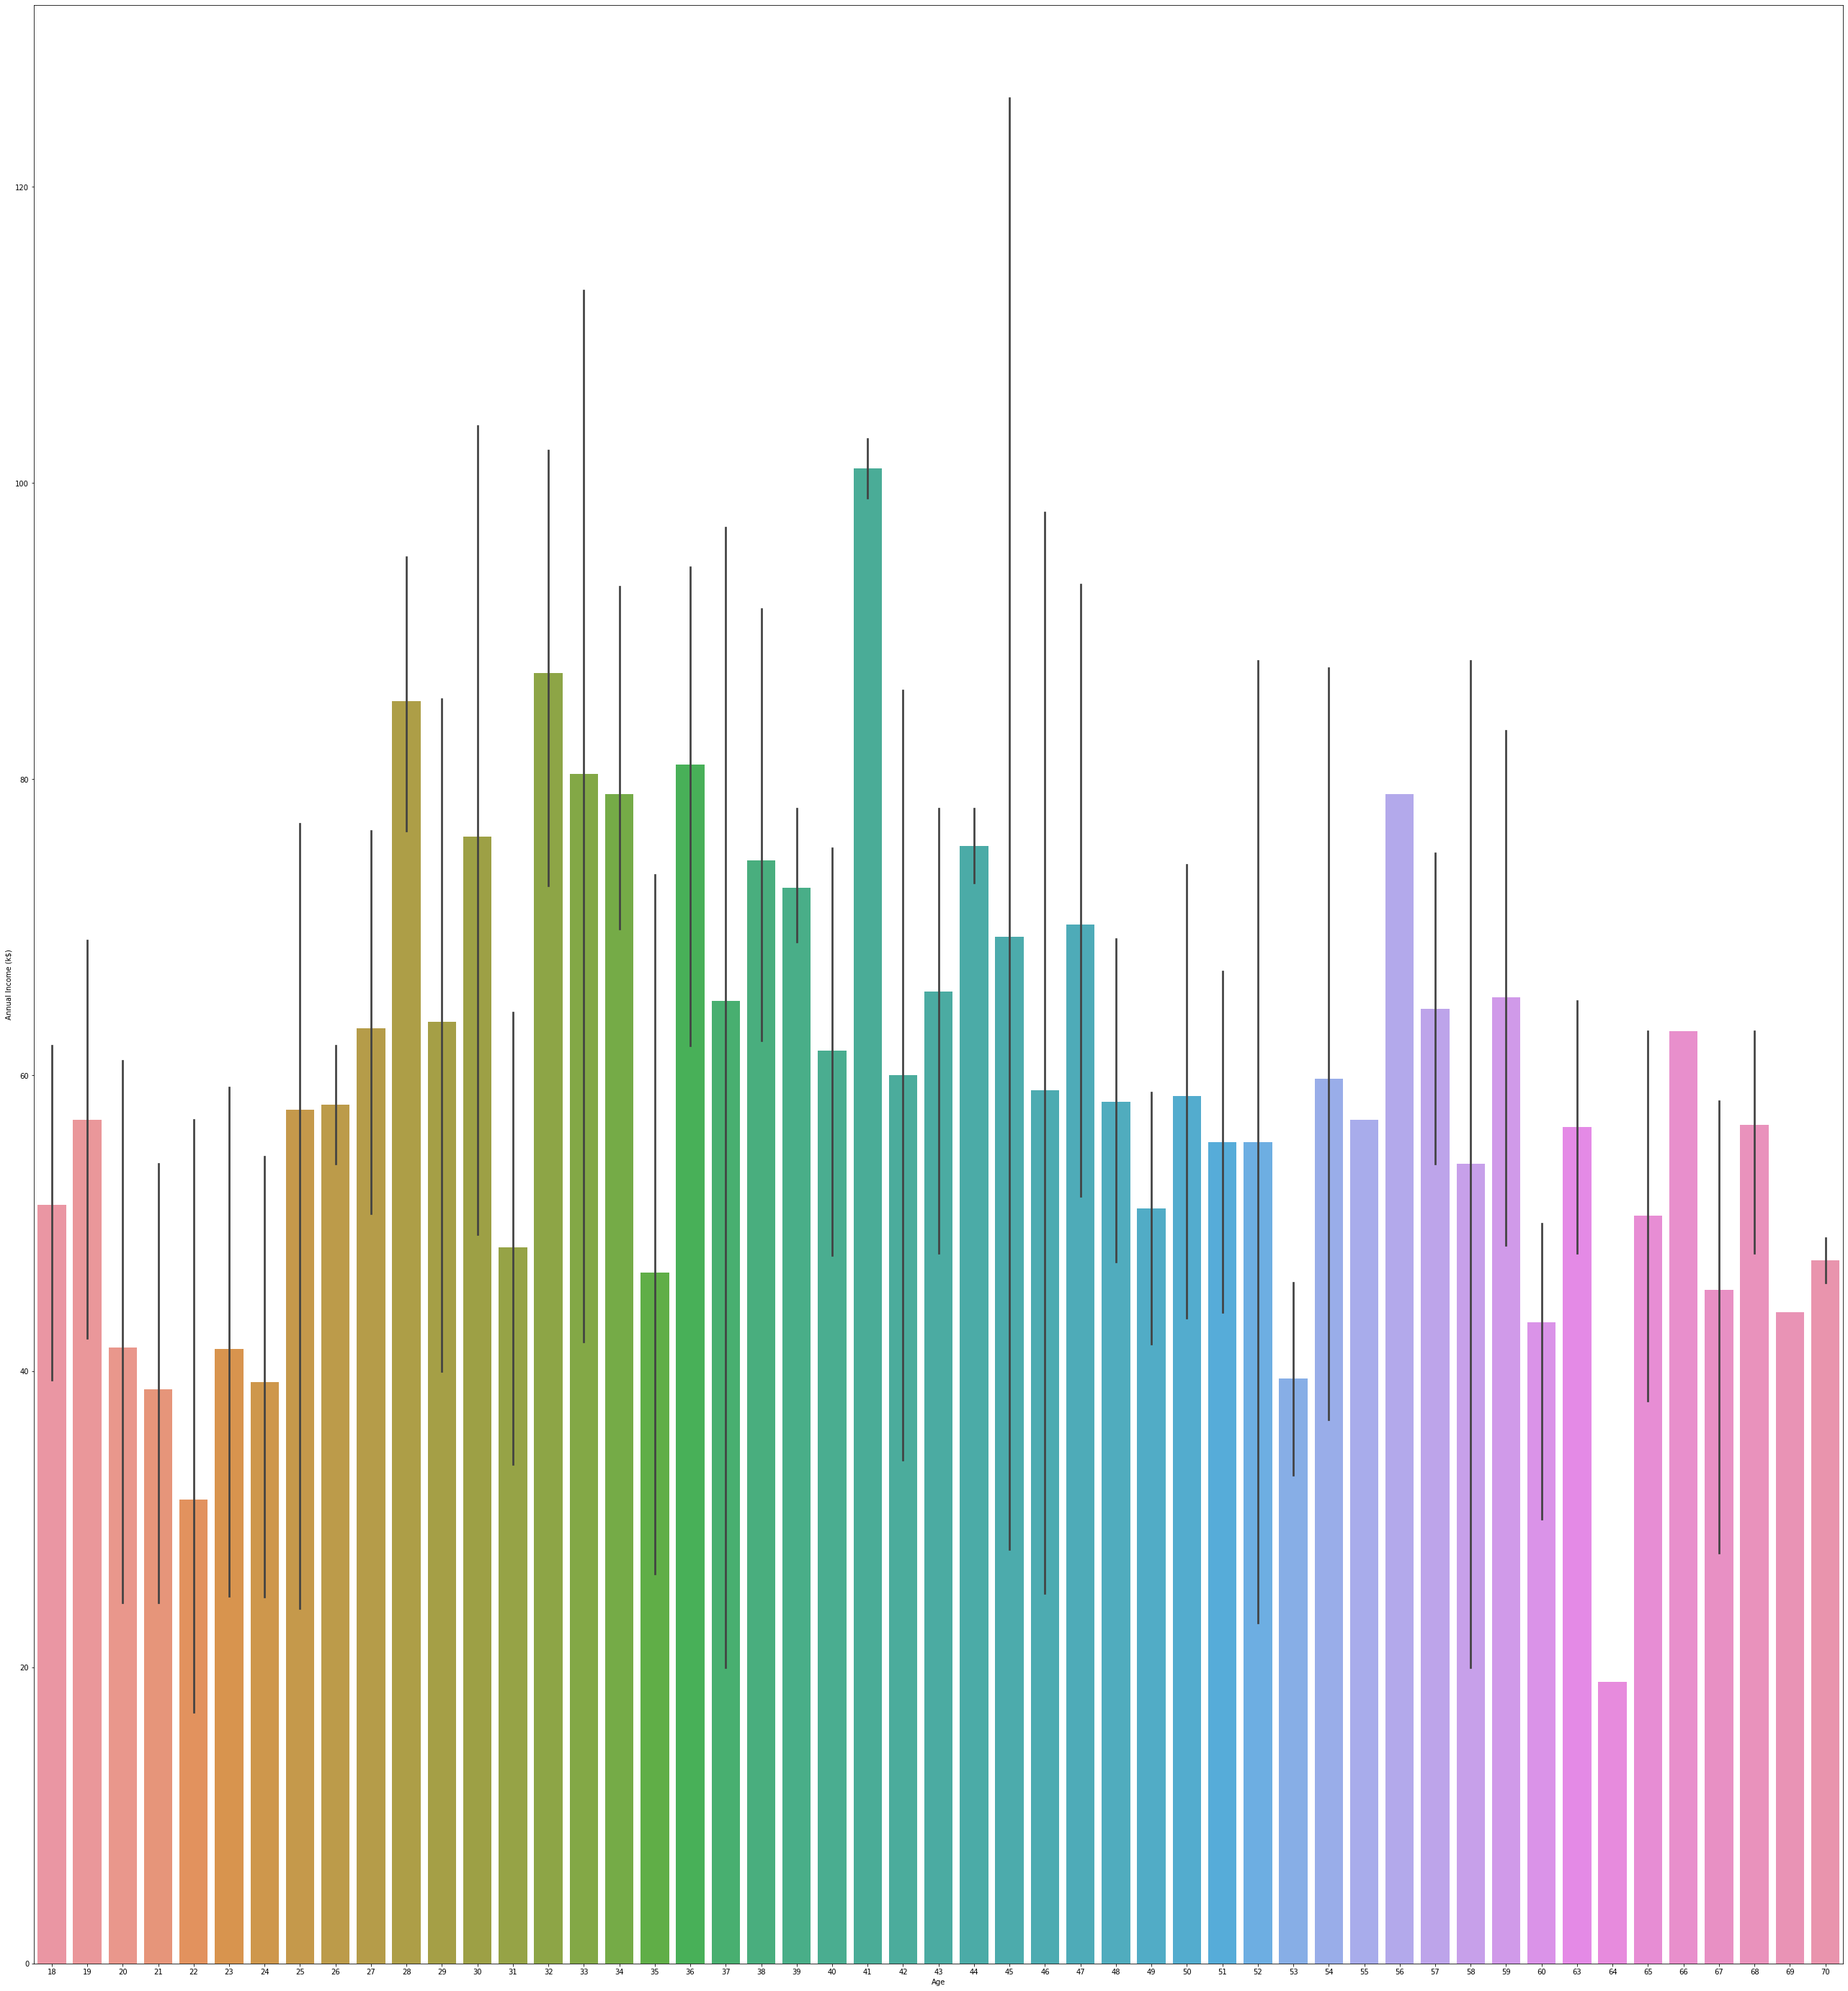

In [8]:
plt.figure(figsize=(45,50))
sns.barplot(df['Age'], df['Annual Income (k$)'])

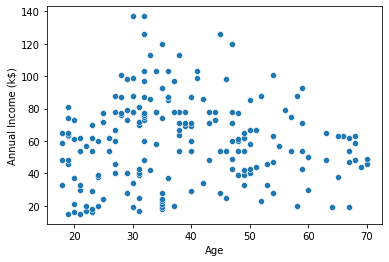

In [9]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)')

# Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


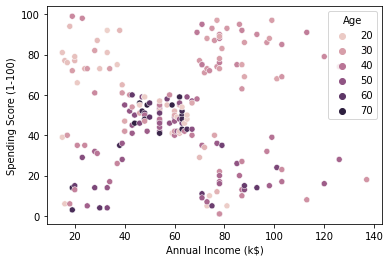

In [10]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue = df["Age"])

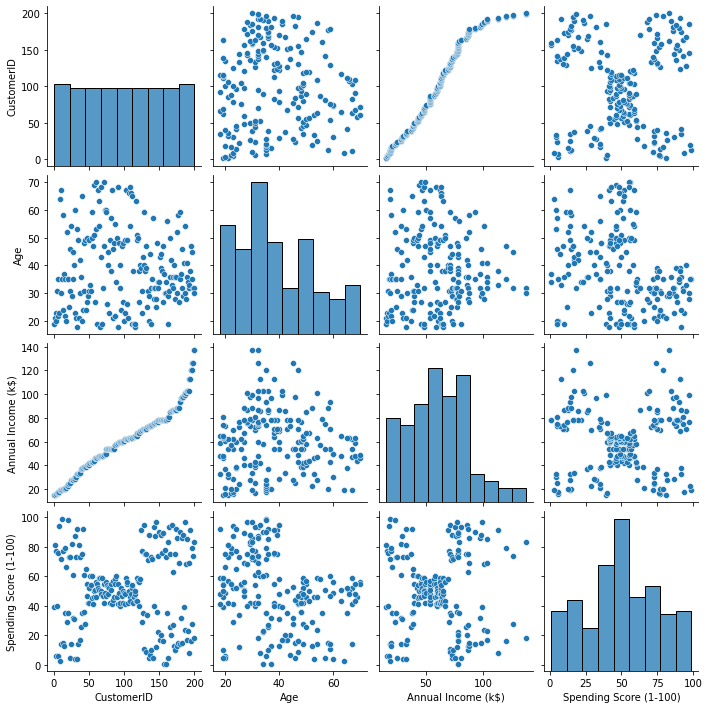

In [11]:
sns.pairplot(df)

# Descriptive Statistics

In [20]:
df.mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [21]:
df.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [22]:
df['Age'].mode()

0    32
dtype: int64

In [23]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [24]:
df.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


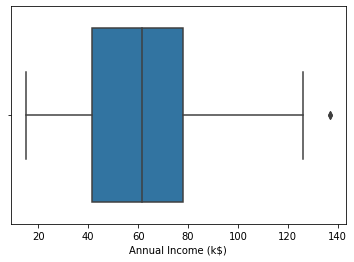

In [28]:
sns.boxplot(df['Annual Income (k$)'])

In [29]:
q = df.quantile([0.75,0.25])

In [30]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [31]:
iqr =  q.iloc[0] - q.iloc[1] 

In [32]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [33]:
u = q.iloc[0] + (1.5*iqr)  

In [34]:
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [35]:
l = q.iloc[1] - (1.5*iqr) 

In [36]:
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [37]:
df['Annual Income (k$)'] = np.where(np.logical_or(df['Annual Income (k$)']>132.75,df['Annual Income (k$)']<-13.250), 61.5,df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


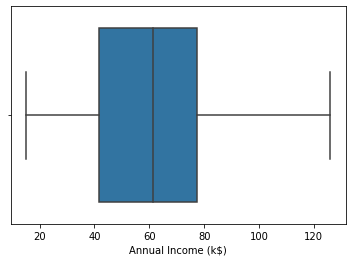

In [38]:
sns.boxplot(df['Annual Income (k$)'])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(df)

In [42]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [43]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster = KM.fit_predict(x_scaled)

In [44]:
cluster

array([1, 1, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 0, 4, 1, 1, 4, 1, 3, 4, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 4, 3, 4, 3, 1, 0, 4, 0, 4, 4, 4, 0, 1, 3, 4,
       0, 4, 0, 4, 4, 4, 0, 1, 4, 3, 0, 3, 0, 3, 4, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 4, 3, 0, 0, 0, 3, 1, 0, 1, 4, 0, 3, 1, 3, 0, 4, 3, 0, 4,
       4, 0, 0, 1, 3, 0, 4, 1, 0, 4, 3, 1, 4, 0, 3, 1, 3, 4, 0, 3, 3, 3,
       3, 4, 6, 1, 4, 4, 0, 0, 0, 0, 7, 6, 2, 7, 6, 2, 5, 7, 5, 7, 5, 7,
       6, 2, 5, 2, 6, 7, 5, 2, 6, 7, 6, 2, 5, 7, 5, 2, 6, 7, 5, 7, 6, 2,
       6, 2, 5, 2, 5, 2, 6, 2, 5, 2, 5, 2, 5, 2, 6, 7, 5, 7, 5, 7, 6, 2,
       5, 7, 5, 7, 6, 2, 5, 2, 6, 7, 6, 7, 6, 2, 6, 2, 5, 2, 6, 2, 6, 7,
       5, 7], dtype=int32)

In [45]:
value = df.columns

In [46]:
value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [47]:
data1 = pd.DataFrame(x_scaled, columns = value)

In [48]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [49]:
data1['Cluster_value'] = pd.Series(cluster)

In [50]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,1
1,0.005025,1.0,0.057692,0.000000,0.816327,1
2,0.010050,0.0,0.038462,0.009009,0.051020,4
3,0.015075,0.0,0.096154,0.009009,0.775510,4
4,0.020101,0.0,0.250000,0.018018,0.397959,4


# Split the data in X and Y

In [51]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)
x = data1
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


In [52]:
y

0      1
1      1
2      4
3      4
4      4
      ..
195    2
196    6
197    7
198    5
199    7
Name: Cluster_value, Length: 200, dtype: int32

# Split x and y into Training and Testing

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [54]:
x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [55]:
x_train.shape

(140, 5)

In [56]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [57]:
x_test.shape

(60, 5)

In [58]:
y_train

131    7
96     0
181    2
19     4
153    2
      ..
67     0
192    5
117    0
47     4
172    5
Name: Cluster_value, Length: 140, dtype: int32

In [59]:
y_test

18     3
170    5
107    3
98     3
177    7
182    5
5      4
146    5
12     0
152    6
61     1
125    2
180    6
154    6
80     3
7      4
33     1
130    5
37     4
74     3
183    2
145    7
45     4
159    2
60     3
123    7
179    7
185    7
122    2
44     0
16     4
55     3
150    5
111    4
22     0
189    2
129    7
4      4
83     0
106    0
134    5
66     0
26     0
113    1
168    6
63     0
8      3
75     1
118    0
143    2
71     0
124    6
184    6
97     4
149    7
24     0
30     3
160    6
40     0
56     0
Name: Cluster_value, dtype: int32

# Multi inear regression model

In [60]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [61]:
pred = mlr.predict(x_test)

In [62]:
pred

array([1.93359802, 5.29976874, 3.12558858, 3.24348611, 5.11292894,
       5.17624848, 1.50479232, 4.21998611, 1.13055655, 4.06088576,
       3.53299076, 3.20462154, 4.56223312, 4.04780605, 2.43420392,
       1.22828943, 2.54107211, 4.37696566, 1.75483185, 2.28227212,
       4.09019966, 4.06594647, 2.23156315, 3.96972798, 1.49495351,
       3.3258868 , 4.47121143, 4.62746686, 3.08158214, 1.78438337,
       1.81006014, 2.54544406, 4.77922909, 3.78894913, 1.91723687,
       3.93730032, 3.71627698, 1.67027735, 2.35911427, 1.89390632,
       5.56255431, 2.07654314, 1.60574416, 4.62083384, 4.52328607,
       1.45440531, 1.67635407, 3.49397871, 2.80911365, 3.34754967,
       2.13972173, 4.21729783, 4.36642664, 3.25770167, 4.01338103,
       1.47855907, 2.18276451, 3.53147788, 0.97387838, 1.58562914])

In [63]:
y_test

18     3
170    5
107    3
98     3
177    7
182    5
5      4
146    5
12     0
152    6
61     1
125    2
180    6
154    6
80     3
7      4
33     1
130    5
37     4
74     3
183    2
145    7
45     4
159    2
60     3
123    7
179    7
185    7
122    2
44     0
16     4
55     3
150    5
111    4
22     0
189    2
129    7
4      4
83     0
106    0
134    5
66     0
26     0
113    1
168    6
63     0
8      3
75     1
118    0
143    2
71     0
124    6
184    6
97     4
149    7
24     0
30     3
160    6
40     0
56     0
Name: Cluster_value, dtype: int32

# Performance metrics

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [65]:
mean= mean_squared_error(y_test,pred)
mean

3.5241069544238144

In [66]:
rmse = np.sqrt(mean)
rmse

1.8772604918933904

In [67]:
r2_score(y_test,pred)

0.38125316836101575